In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import time, os, sys
import tushare as ts
from datetime import datetime, date, timedelta
from tradingScan import TradingScan
from tradingConfig import TradingConfig
from stockData import StockData
from players import Players
import tushare as ts

In [ ]:
# todo
# all RMA10 < -10
# filter HSL, trigger_RMA10, max/min(10,20,30)

In [2]:
sd = StockData('csv','20211001','20211231')
sd.getStockDf()
sd.printSummary()

Start date: 20211001

End date: 20211224
All trading days in selected period are ['20211008', '20211011', '20211012', '20211013', '20211014', '20211015', '20211018', '20211019', '20211020', '20211021', '20211022', '20211025', '20211026', '20211027', '20211028', '20211029', '20211101', '20211102', '20211103', '20211104', '20211105', '20211108', '20211109', '20211110', '20211111', '20211112', '20211115', '20211116', '20211117', '20211118', '20211119', '20211122', '20211123', '20211124', '20211125', '20211126', '20211129', '20211130', '20211201', '20211202', '20211203', '20211206', '20211207', '20211208', '20211209', '20211210', '20211213', '20211214', '20211215', '20211216', '20211217', '20211220', '20211221', '20211222', '20211223', '20211224']
trading date in data 20211008 and input 20211008
trading date in data 20211011 and input 20211011
trading date in data 20211012 and input 20211012
trading date in data 20211013 and input 20211013
trading date in data 20211014 and input 20211014
t

'csv数据加载成功！共 56 个交易日， 共有4671只股票，共有256277 条股票交易信息。'

In [6]:
# test filter the df 
stockList = sd.getAllStockNames()
cyb_list = [x for x in stockList if x[:2]== '30']
zxb_list = [x for x in stockList if x[:3] in ['002','003']]
kcb_list = [x for x in stockList if x[:3] in ['688','689']]
shb_list = [x for x in stockList if x[:2]== '60']
szb_list = [x for x in stockList if x[:3] in ['000','001']]
bj_list =  [x for x in stockList if x[-3:] == '.BJ']
stock_df = sd.stockDf

def filterDf(daily_df,stockList):
    player_df = daily_df[daily_df.ts_code.isin(stockList)]    
    return player_df

playerDf = filterDf(stock_df,bj_list)
#playerDf = filterDf(stock_df,zxb_list)

In [7]:
tc = TradingConfig(30,-10,10,10,-10,10,100,10)
print(ts.printSummary())
player = Players(1,'QQ',1000000,stock_df,tc)

player2 = Players(2,'GG',1000000,playerDf,tc)
player.printPlayerInfo()

交易参数设置完成! 当RMA10值大于30时加入备选股票池，                        当RMA10小于-10且当天换手率大于10%时买入股票，                        当获利超过10%时卖出股票。


'QQ 你好，你的初始资金为1000000，你的当前余额为1000000，你当前持有股票为[]。'

start to scan 002725.SZ
002725.SZ find buy signal 2021-12-23 00:00:00 rma10 -13.954358398802846 price 11.5


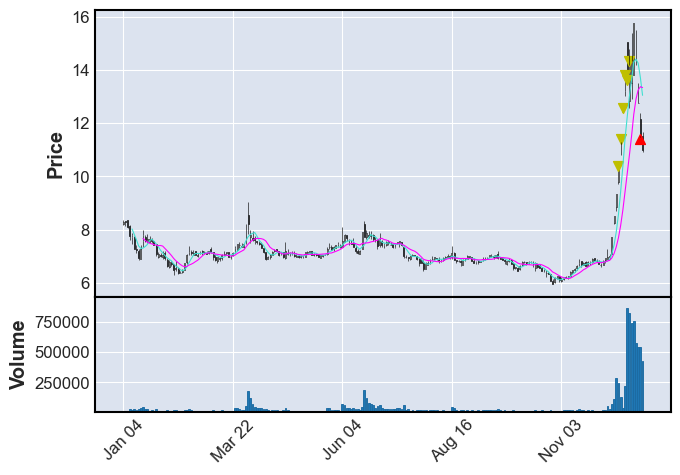

<Figure size 640x480 with 0 Axes>

In [118]:
#player.tradingScan_single('688022.SH')
player.drawKlines('002725.SZ')
#player.tradingScan()

In [8]:
tradingEntries = player.tradingScan()

/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002001.SZ
start to scan 002002.SZ
start to scan 002003.SZ
start to scan 002004.SZ
start to scan 002005.SZ
start to scan 002006.SZ
start to scan 002007.SZ
start to scan 002008.SZ
start to scan 002009.SZ
start to scan 002010.SZ
start to scan 002011.SZ
start to scan 002012.SZ
start to scan 002013.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002014.SZ
start to scan 002015.SZ
start to scan 002016.SZ
start to scan 002017.SZ
start to scan 002019.SZ
start to scan 002020.SZ
start to scan 002021.SZ
start to scan 002022.SZ
start to scan 002023.SZ
start to scan 002024.SZ
start to scan 002025.SZ
start to scan 002026.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002027.SZ
start to scan 002028.SZ
start to scan 002029.SZ
start to scan 002030.SZ
start to scan 002031.SZ
start to scan 002032.SZ
start to scan 002033.SZ
start to scan 002034.SZ
start to scan 002035.SZ
start to scan 002036.SZ
start to scan 002037.SZ
start to scan 002038.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002039.SZ
start to scan 002040.SZ
start to scan 002041.SZ
start to scan 002042.SZ
start to scan 002043.SZ
start to scan 002044.SZ
start to scan 002045.SZ
start to scan 002046.SZ
start to scan 002047.SZ
start to scan 002048.SZ
start to scan 002049.SZ
start to scan 002050.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

start to scan 002051.SZ
start to scan 002052.SZ
start to scan 002053.SZ
start to scan 002054.SZ
start to scan 002055.SZ
start to scan 002056.SZ
start to scan 002057.SZ
start to scan 002058.SZ
start to scan 002059.SZ
start to scan 002060.SZ
start to scan 002061.SZ
start to scan 002062.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002063.SZ
start to scan 002064.SZ
start to scan 002065.SZ
start to scan 002066.SZ
start to scan 002067.SZ
start to scan 002068.SZ
start to scan 002069.SZ
start to scan 002072.SZ
start to scan 002073.SZ
002073.SZ find buy signal 2021-11-25 00:00:00 rma10 -10.69114470842333 price 8.27
002073.SZ find sell signal 2021-11-30 00:00:00 rma10 4.320573091560322 price 9.32
start to scan 002074.SZ
start to scan 002075.SZ
start to scan 002076.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigger_signal   = []
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

start to scan 002077.SZ
start to scan 002078.SZ
start to scan 002079.SZ
start to scan 002080.SZ
start to scan 002081.SZ
start to scan 002082.SZ
start to scan 002083.SZ
start to scan 002084.SZ
start to scan 002085.SZ
start to scan 002086.SZ
start to scan 002087.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous = -1.0
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

start to scan 002088.SZ
start to scan 002089.SZ
start to scan 002090.SZ
start to scan 002091.SZ
start to scan 002092.SZ
start to scan 002093.SZ
start to scan 002094.SZ
start to scan 002095.SZ
start to scan 002096.SZ
start to scan 002097.SZ
start to scan 002098.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002099.SZ
start to scan 002100.SZ
start to scan 002101.SZ
start to scan 002102.SZ
start to scan 002103.SZ
start to scan 002104.SZ
start to scan 002105.SZ
start to scan 002106.SZ
start to scan 002107.SZ
start to scan 002108.SZ
start to scan 002109.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002110.SZ
start to scan 002111.SZ
start to scan 002112.SZ
start to scan 002113.SZ
start to scan 002114.SZ
start to scan 002115.SZ
start to scan 002116.SZ
start to scan 002117.SZ
start to scan 002118.SZ
start to scan 002119.SZ
start to scan 002120.SZ
start to scan 002121.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigger_signal   = []
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

start to scan 002122.SZ
start to scan 002123.SZ
start to scan 002124.SZ
start to scan 002125.SZ
start to scan 002126.SZ
start to scan 002127.SZ
start to scan 002128.SZ
start to scan 002129.SZ
start to scan 002130.SZ
start to scan 002131.SZ
start to scan 002132.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous = -1.0
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

start to scan 002133.SZ
start to scan 002134.SZ
start to scan 002135.SZ
start to scan 002136.SZ
start to scan 002137.SZ
start to scan 002138.SZ
start to scan 002139.SZ
start to scan 002140.SZ
start to scan 002141.SZ
start to scan 002142.SZ
start to scan 002144.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002145.SZ
start to scan 002146.SZ
start to scan 002147.SZ
start to scan 002148.SZ
start to scan 002149.SZ
start to scan 002150.SZ
start to scan 002151.SZ
start to scan 002152.SZ
start to scan 002153.SZ
start to scan 002154.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002155.SZ
start to scan 002156.SZ
start to scan 002157.SZ
start to scan 002158.SZ
start to scan 002159.SZ
start to scan 002160.SZ
start to scan 002161.SZ
start to scan 002162.SZ
start to scan 002163.SZ
start to scan 002164.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous = -1.0
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

start to scan 002165.SZ
002165.SZ find buy signal 2021-10-08 00:00:00 rma10 -14.941103533787983 price 6.86
002165.SZ find sell signal 2021-10-28 00:00:00 rma10 17.211328976034867 price 8.07
start to scan 002166.SZ
start to scan 002167.SZ
start to scan 002168.SZ
start to scan 002169.SZ
start to scan 002170.SZ
start to scan 002171.SZ
start to scan 002172.SZ
start to scan 002173.SZ
start to scan 002174.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002175.SZ
start to scan 002176.SZ
start to scan 002177.SZ
start to scan 002178.SZ
start to scan 002179.SZ
start to scan 002180.SZ
start to scan 002181.SZ
start to scan 002182.SZ
start to scan 002183.SZ
start to scan 002184.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

start to scan 002185.SZ
start to scan 002186.SZ
start to scan 002187.SZ
start to scan 002188.SZ
start to scan 002189.SZ
start to scan 002190.SZ
start to scan 002191.SZ
start to scan 002192.SZ
start to scan 002193.SZ
start to scan 002194.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous = -1.0
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

start to scan 002195.SZ
start to scan 002196.SZ
start to scan 002197.SZ
start to scan 002198.SZ
start to scan 002199.SZ
start to scan 002200.SZ
start to scan 002201.SZ
start to scan 002202.SZ
start to scan 002203.SZ
start to scan 002204.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

start to scan 002205.SZ
start to scan 002206.SZ
start to scan 002207.SZ
start to scan 002208.SZ
start to scan 002209.SZ
start to scan 002210.SZ
start to scan 002211.SZ
start to scan 002212.SZ
start to scan 002213.SZ
start to scan 002214.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigger_signal   = []
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

start to scan 002215.SZ
start to scan 002216.SZ
start to scan 002217.SZ
start to scan 002218.SZ
start to scan 002219.SZ
start to scan 002221.SZ
start to scan 002222.SZ
start to scan 002223.SZ
start to scan 002224.SZ
start to scan 002225.SZ
start to scan 002226.SZ

/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigger_signal   = []
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 


start to scan 002227.SZ
start to scan 002228.SZ
start to scan 002229.SZ
start to scan 002230.SZ
start to scan 002231.SZ
start to scan 002232.SZ
002232.SZ find buy signal 2021-12-24 00:00:00 rma10 -10.791931000071274 price 25.03
start to scan 002233.SZ
start to scan 002234.SZ
start to scan 002235.SZ
start to scan 002236.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

start to scan 002237.SZ
start to scan 002238.SZ
start to scan 002239.SZ
start to scan 002240.SZ
start to scan 002241.SZ
start to scan 002242.SZ
start to scan 002243.SZ
start to scan 002244.SZ
start to scan 002245.SZ
start to scan 002246.SZ
start to scan 002247.SZ
start to scan 002248.SZ

/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer


start to scan 002249.SZ
start to scan 002250.SZ
start to scan 002251.SZ
start to scan 002252.SZ
start to scan 002253.SZ
start to scan 002254.SZ
start to scan 002255.SZ
start to scan 002256.SZ
start to scan 002258.SZ
start to scan 002259.SZ
start to scan 002261.SZ
start to scan 002262.SZ
start to scan 002263.SZ

/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer


start to scan 002264.SZ
start to scan 002265.SZ
start to scan 002266.SZ
start to scan 002267.SZ
start to scan 002268.SZ
start to scan 002269.SZ
start to scan 002270.SZ
start to scan 002271.SZ
start to scan 002272.SZ
start to scan 002273.SZ
start to scan 002274.SZ
start to scan 002275.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous = -1.0
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

start to scan 002276.SZ
start to scan 002277.SZ
start to scan 002278.SZ
start to scan 002279.SZ
start to scan 002280.SZ
start to scan 002281.SZ
start to scan 002282.SZ
start to scan 002283.SZ
start to scan 002284.SZ
start to scan 002285.SZ
start to scan 002286.SZ
start to scan 002287.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002288.SZ
start to scan 002289.SZ
start to scan 002290.SZ
start to scan 002291.SZ
start to scan 002292.SZ
start to scan 002293.SZ
start to scan 002294.SZ
start to scan 002295.SZ
start to scan 002296.SZ
start to scan 002297.SZ
start to scan 002298.SZ
start to scan 002299.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous = -1.0
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

start to scan 002300.SZ
start to scan 002301.SZ
start to scan 002302.SZ
start to scan 002303.SZ
start to scan 002304.SZ
start to scan 002305.SZ
start to scan 002306.SZ
start to scan 002307.SZ
start to scan 002308.SZ
start to scan 002309.SZ
start to scan 002310.SZ
start to scan 002311.SZ
start to scan 002312.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigger_signal   = []
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

start to scan 002313.SZ
start to scan 002314.SZ
start to scan 002315.SZ
start to scan 002316.SZ
start to scan 002317.SZ
start to scan 002318.SZ
start to scan 002319.SZ
start to scan 002320.SZ
start to scan 002321.SZ
start to scan 002322.SZ
start to scan 002323.SZ
start to scan 002324.SZ
start to scan 002325.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous = -1.0
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

start to scan 002326.SZ
start to scan 002327.SZ
start to scan 002328.SZ
start to scan 002329.SZ
start to scan 002330.SZ
start to scan 002331.SZ
start to scan 002332.SZ
start to scan 002333.SZ
start to scan 002334.SZ
start to scan 002335.SZ
start to scan 002336.SZ
start to scan 002337.SZ
start to scan 002338.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002339.SZ
start to scan 002340.SZ
start to scan 002341.SZ
start to scan 002342.SZ
start to scan 002343.SZ
start to scan 002344.SZ
start to scan 002345.SZ
start to scan 002346.SZ
start to scan 002347.SZ
start to scan 002348.SZ
start to scan 002349.SZ
start to scan 002350.SZ
start to scan 002351.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

start to scan 002352.SZ
start to scan 002353.SZ
start to scan 002354.SZ
start to scan 002355.SZ
start to scan 002356.SZ
start to scan 002357.SZ
start to scan 002358.SZ
start to scan 002360.SZ
start to scan 002361.SZ
start to scan 002362.SZ
start to scan 002363.SZ
start to scan 002364.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002365.SZ
start to scan 002366.SZ
start to scan 002367.SZ
start to scan 002368.SZ
start to scan 002369.SZ
start to scan 002370.SZ
start to scan 002371.SZ
start to scan 002372.SZ
start to scan 002373.SZ
start to scan 002374.SZ
start to scan 002375.SZ
start to scan 002376.SZ
start to scan 002377.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

start to scan 002378.SZ
start to scan 002379.SZ
start to scan 002380.SZ
start to scan 002381.SZ
start to scan 002382.SZ
start to scan 002383.SZ
start to scan 002384.SZ
start to scan 002385.SZ
start to scan 002386.SZ
start to scan 002387.SZ
start to scan 002388.SZ
start to scan 002389.SZ
start to scan 002390.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002391.SZ
start to scan 002392.SZ
start to scan 002393.SZ
start to scan 002394.SZ
start to scan 002395.SZ
start to scan 002396.SZ
start to scan 002397.SZ
start to scan 002398.SZ
start to scan 002399.SZ
start to scan 002400.SZ
start to scan 002401.SZ
start to scan 002402.SZ
start to scan 002403.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002404.SZ
start to scan 002405.SZ
start to scan 002406.SZ
start to scan 002407.SZ
start to scan 002408.SZ
start to scan 002409.SZ
start to scan 002410.SZ
start to scan 002411.SZ
start to scan 002412.SZ
start to scan 002413.SZ
start to scan 002414.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous = -1.0
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

start to scan 002415.SZ
start to scan 002416.SZ
start to scan 002417.SZ
start to scan 002418.SZ
start to scan 002419.SZ
start to scan 002420.SZ
start to scan 002421.SZ
start to scan 002422.SZ
start to scan 002423.SZ
start to scan 002424.SZ
start to scan 002425.SZ
start to scan 002426.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002427.SZ
start to scan 002428.SZ
start to scan 002429.SZ
start to scan 002430.SZ
start to scan 002431.SZ
start to scan 002432.SZ
start to scan 002433.SZ
start to scan 002434.SZ
start to scan 002435.SZ
start to scan 002436.SZ
start to scan 002437.SZ
start to scan 002438.SZ
start to scan 002439.SZ
start to scan 002440.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

start to scan 002441.SZ
start to scan 002442.SZ
start to scan 002443.SZ
start to scan 002444.SZ
start to scan 002445.SZ
start to scan 002446.SZ
start to scan 002447.SZ
start to scan 002448.SZ
start to scan 002449.SZ
start to scan 002451.SZ
start to scan 002452.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002453.SZ
start to scan 002454.SZ
start to scan 002455.SZ
start to scan 002456.SZ
start to scan 002457.SZ
start to scan 002458.SZ
start to scan 002459.SZ
start to scan 002460.SZ
start to scan 002461.SZ
start to scan 002462.SZ
start to scan 002463.SZ
start to scan 002464.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002465.SZ
start to scan 002466.SZ
start to scan 002467.SZ
start to scan 002468.SZ
start to scan 002469.SZ
start to scan 002470.SZ
start to scan 002471.SZ
start to scan 002472.SZ
start to scan 002473.SZ
start to scan 002474.SZ
start to scan 002475.SZ
start to scan 002476.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigger_signal   = []
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

start to scan 002478.SZ
start to scan 002479.SZ
start to scan 002480.SZ
start to scan 002481.SZ
start to scan 002482.SZ
start to scan 002483.SZ
start to scan 002484.SZ
start to scan 002485.SZ
start to scan 002486.SZ
start to scan 002487.SZ
002487.SZ find buy signal 2021-12-07 00:00:00 rma10 -12.616624257845636 price 41.21
start to scan 002488.SZ
start to scan 002489.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigger_signal   = []
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

start to scan 002490.SZ
start to scan 002491.SZ
start to scan 002492.SZ
start to scan 002493.SZ
start to scan 002494.SZ
start to scan 002495.SZ
start to scan 002496.SZ
start to scan 002497.SZ
start to scan 002498.SZ
start to scan 002499.SZ
start to scan 002500.SZ
start to scan 002501.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002502.SZ
start to scan 002503.SZ
start to scan 002504.SZ
start to scan 002505.SZ
start to scan 002506.SZ
start to scan 002507.SZ
start to scan 002508.SZ
start to scan 002510.SZ
start to scan 002511.SZ
start to scan 002512.SZ
start to scan 002513.SZ
start to scan 002514.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002515.SZ
start to scan 002516.SZ
start to scan 002517.SZ
start to scan 002518.SZ
start to scan 002519.SZ
start to scan 002520.SZ
start to scan 002521.SZ
start to scan 002522.SZ
start to scan 002523.SZ
start to scan 002524.SZ
start to scan 002526.SZ
start to scan 002527.SZ
start to scan 002528.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002529.SZ
start to scan 002530.SZ
start to scan 002531.SZ
start to scan 002532.SZ
start to scan 002533.SZ
start to scan 002534.SZ
start to scan 002535.SZ
start to scan 002536.SZ
start to scan 002537.SZ
start to scan 002538.SZ
start to scan 002539.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous = -1.0
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

start to scan 002540.SZ
start to scan 002541.SZ
start to scan 002542.SZ
start to scan 002543.SZ
start to scan 002544.SZ
start to scan 002545.SZ
start to scan 002546.SZ
start to scan 002547.SZ
start to scan 002548.SZ
start to scan 002549.SZ
start to scan 002550.SZ
start to scan 002551.SZ
start to scan 002552.SZ

/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigger_signal   = []
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 


start to scan 002553.SZ
start to scan 002554.SZ
start to scan 002555.SZ
start to scan 002556.SZ
start to scan 002557.SZ
start to scan 002558.SZ
start to scan 002559.SZ
start to scan 002560.SZ
start to scan 002561.SZ
start to scan 002562.SZ
start to scan 002563.SZ
start to scan 002564.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous = -1.0
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

start to scan 002565.SZ
start to scan 002566.SZ
start to scan 002567.SZ
start to scan 002568.SZ
start to scan 002569.SZ
start to scan 002570.SZ
start to scan 002571.SZ
start to scan 002572.SZ
start to scan 002573.SZ
start to scan 002574.SZ
start to scan 002575.SZ
start to scan 002576.SZ
start to scan 002577.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigger_signal   = []
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

start to scan 002578.SZ
start to scan 002579.SZ
start to scan 002580.SZ
start to scan 002581.SZ
start to scan 002582.SZ
start to scan 002583.SZ
start to scan 002584.SZ
start to scan 002585.SZ
start to scan 002586.SZ
start to scan 002587.SZ
start to scan 002588.SZ
start to scan 002589.SZ
start to scan 002590.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002591.SZ
start to scan 002592.SZ
start to scan 002593.SZ
start to scan 002594.SZ
start to scan 002595.SZ
start to scan 002596.SZ
start to scan 002597.SZ
start to scan 002598.SZ
start to scan 002599.SZ
start to scan 002600.SZ
start to scan 002601.SZ
start to scan 002602.SZ
start to scan 002603.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002605.SZ
start to scan 002606.SZ
start to scan 002607.SZ
start to scan 002608.SZ
start to scan 002609.SZ
start to scan 002610.SZ
start to scan 002611.SZ
start to scan 002612.SZ
start to scan 002613.SZ
start to scan 002614.SZ
start to scan 002615.SZ
start to scan 002616.SZ
start to scan 002617.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

start to scan 002618.SZ
start to scan 002619.SZ
start to scan 002620.SZ
start to scan 002621.SZ
start to scan 002622.SZ
start to scan 002623.SZ
start to scan 002624.SZ
start to scan 002625.SZ
start to scan 002626.SZ
start to scan 002627.SZ
start to scan 002628.SZ
start to scan 002629.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002630.SZ
start to scan 002631.SZ
start to scan 002632.SZ
start to scan 002633.SZ
start to scan 002634.SZ
start to scan 002635.SZ
start to scan 002636.SZ
start to scan 002637.SZ
start to scan 002638.SZ
start to scan 002639.SZ
start to scan 002640.SZ
start to scan 002641.SZ
start to scan 002642.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

start to scan 002643.SZ
start to scan 002644.SZ
start to scan 002645.SZ
start to scan 002646.SZ
start to scan 002647.SZ
start to scan 002648.SZ
start to scan 002649.SZ
start to scan 002650.SZ
start to scan 002651.SZ
start to scan 002652.SZ
start to scan 002653.SZ
start to scan 002654.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

start to scan 002655.SZ
start to scan 002656.SZ
start to scan 002657.SZ
start to scan 002658.SZ
start to scan 002659.SZ
start to scan 002660.SZ
start to scan 002661.SZ
start to scan 002662.SZ
start to scan 002663.SZ
start to scan 002664.SZ
start to scan 002665.SZ
start to scan 002666.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002667.SZ
start to scan 002668.SZ
start to scan 002669.SZ
start to scan 002670.SZ
start to scan 002671.SZ
start to scan 002672.SZ
start to scan 002673.SZ
start to scan 002674.SZ
start to scan 002675.SZ
start to scan 002676.SZ
start to scan 002677.SZ
start to scan 002678.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

start to scan 002679.SZ
start to scan 002681.SZ
start to scan 002682.SZ
start to scan 002683.SZ
start to scan 002684.SZ
start to scan 002685.SZ
start to scan 002686.SZ
start to scan 002687.SZ
start to scan 002688.SZ
start to scan 002689.SZ
start to scan 002690.SZ
start to scan 002691.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigger_signal   = []
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

start to scan 002692.SZ
start to scan 002693.SZ
start to scan 002694.SZ
start to scan 002695.SZ
start to scan 002696.SZ
start to scan 002697.SZ
start to scan 002698.SZ
start to scan 002699.SZ
002699.SZ find buy signal 2021-12-24 00:00:00 rma10 -10.390973497769613 price 6.83
start to scan 002700.SZ
start to scan 002701.SZ
start to scan 002702.SZ
start to scan 002703.SZ
start to scan 002705.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002706.SZ
start to scan 002707.SZ
start to scan 002708.SZ
start to scan 002709.SZ
start to scan 002712.SZ
start to scan 002713.SZ
start to scan 002714.SZ
start to scan 002715.SZ
start to scan 002716.SZ
start to scan 002717.SZ
start to scan 002718.SZ
start to scan 002719.SZ
start to scan 002721.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002722.SZ
start to scan 002723.SZ
start to scan 002724.SZ
start to scan 002725.SZ
002725.SZ find buy signal 2021-12-23 00:00:00 rma10 -13.954358398802846 price 11.5
start to scan 002726.SZ
start to scan 002727.SZ
start to scan 002728.SZ
start to scan 002729.SZ
start to scan 002730.SZ
start to scan 002731.SZ
start to scan 002732.SZ
start to scan 002733.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

start to scan 002734.SZ
start to scan 002735.SZ
start to scan 002736.SZ
start to scan 002737.SZ
start to scan 002738.SZ
start to scan 002739.SZ
start to scan 002740.SZ
start to scan 002741.SZ
start to scan 002742.SZ
start to scan 002743.SZ
start to scan 002745.SZ
start to scan 002746.SZ
start to scan 002747.SZ
start to scan 002748.SZ
002748.SZ find buy signal 2021-09-24 00:00:00 rma10 -10.812672176308542 price 10.36
002748.SZ find sell signal 2021-10-27 00:00:00 rma10 10.997679814385156 price 11.96


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002749.SZ
start to scan 002750.SZ
start to scan 002751.SZ
start to scan 002752.SZ
start to scan 002753.SZ
start to scan 002755.SZ
start to scan 002756.SZ
start to scan 002757.SZ
start to scan 002758.SZ
start to scan 002759.SZ
start to scan 002760.SZ
start to scan 002761.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002762.SZ
start to scan 002763.SZ
start to scan 002765.SZ
start to scan 002766.SZ
start to scan 002767.SZ
start to scan 002768.SZ
start to scan 002769.SZ
start to scan 002770.SZ
start to scan 002771.SZ
start to scan 002772.SZ
start to scan 002773.SZ
start to scan 002774.SZ
start to scan 002775.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigger_signal   = []
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

start to scan 002776.SZ
start to scan 002777.SZ
start to scan 002778.SZ
start to scan 002779.SZ
start to scan 002780.SZ
start to scan 002781.SZ
start to scan 002782.SZ
start to scan 002783.SZ
start to scan 002785.SZ
start to scan 002786.SZ
start to scan 002787.SZ
start to scan 002788.SZ
start to scan 002789.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002790.SZ
start to scan 002791.SZ
start to scan 002792.SZ
start to scan 002793.SZ
start to scan 002795.SZ
start to scan 002796.SZ
start to scan 002797.SZ
start to scan 002798.SZ
start to scan 002799.SZ
start to scan 002800.SZ
start to scan 002801.SZ
start to scan 002802.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002803.SZ
start to scan 002805.SZ
002805.SZ find buy signal 2021-12-09 00:00:00 rma10 -11.393256914690761 price 39.5
start to scan 002806.SZ
start to scan 002807.SZ
start to scan 002808.SZ
start to scan 002809.SZ
start to scan 002810.SZ
start to scan 002811.SZ
start to scan 002812.SZ
start to scan 002813.SZ
start to scan 002815.SZ
start to scan 002816.SZ
start to scan 002817.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous = -1.0
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

start to scan 002818.SZ
start to scan 002819.SZ
start to scan 002820.SZ
start to scan 002821.SZ
start to scan 002822.SZ
start to scan 002823.SZ
start to scan 002824.SZ
start to scan 002825.SZ
start to scan 002826.SZ
start to scan 002827.SZ
start to scan 002828.SZ
start to scan 002829.SZ
start to scan 002830.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002831.SZ
start to scan 002832.SZ
start to scan 002833.SZ
start to scan 002835.SZ
start to scan 002836.SZ
start to scan 002837.SZ
start to scan 002838.SZ
start to scan 002839.SZ
start to scan 002840.SZ
start to scan 002841.SZ
start to scan 002842.SZ
start to scan 002843.SZ
start to scan 002845.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002846.SZ
start to scan 002847.SZ
start to scan 002848.SZ
start to scan 002849.SZ
start to scan 002850.SZ
start to scan 002851.SZ
start to scan 002852.SZ
start to scan 002853.SZ
start to scan 002855.SZ
start to scan 002856.SZ
start to scan 002857.SZ
start to scan 002858.SZ
start to scan 002859.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002860.SZ
start to scan 002861.SZ
start to scan 002862.SZ
start to scan 002863.SZ
start to scan 002864.SZ
start to scan 002865.SZ
start to scan 002866.SZ
start to scan 002867.SZ
start to scan 002868.SZ
start to scan 002869.SZ
start to scan 002870.SZ
002870.SZ find buy signal 2021-12-02 00:00:00 rma10 -11.213183066578267 price 37.5
start to scan 002871.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002872.SZ
start to scan 002873.SZ
start to scan 002875.SZ
start to scan 002876.SZ
start to scan 002877.SZ
start to scan 002878.SZ
start to scan 002879.SZ
start to scan 002880.SZ
start to scan 002881.SZ
start to scan 002882.SZ
start to scan 002883.SZ
start to scan 002884.SZ
start to scan 002885.SZ
002885.SZ find buy signal 2021-12-17 00:00:00 rma10 -11.561264822134387 price 28.64


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002886.SZ
start to scan 002887.SZ
start to scan 002888.SZ
start to scan 002889.SZ
start to scan 002890.SZ
start to scan 002891.SZ
start to scan 002892.SZ
start to scan 002893.SZ
start to scan 002895.SZ
start to scan 002896.SZ
start to scan 002897.SZ
start to scan 002898.SZ
start to scan 002899.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

start to scan 002900.SZ
start to scan 002901.SZ
start to scan 002902.SZ
start to scan 002903.SZ
start to scan 002905.SZ
start to scan 002906.SZ
start to scan 002907.SZ
start to scan 002908.SZ
start to scan 002909.SZ
start to scan 002910.SZ
start to scan 002911.SZ
start to scan 002912.SZ
start to scan 002913.SZ
start to scan 002915.SZ
start to scan 002916.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002917.SZ
start to scan 002918.SZ
start to scan 002919.SZ
start to scan 002920.SZ
start to scan 002921.SZ
start to scan 002922.SZ
002922.SZ find buy signal 2021-11-15 00:00:00 rma10 -10.185902401239344 price 23.19
002922.SZ find sell signal 2021-12-01 00:00:00 rma10 18.322876038663722 price 27.91
start to scan 002923.SZ
start to scan 002925.SZ
start to scan 002926.SZ
start to scan 002927.SZ
start to scan 002928.SZ
start to scan 002929.SZ
start to scan 002930.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002931.SZ
start to scan 002932.SZ
start to scan 002933.SZ
start to scan 002935.SZ
start to scan 002936.SZ
start to scan 002937.SZ
start to scan 002938.SZ
start to scan 002939.SZ
start to scan 002940.SZ
start to scan 002941.SZ
start to scan 002942.SZ
start to scan 002943.SZ
start to scan 002945.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002946.SZ
start to scan 002947.SZ
start to scan 002948.SZ
start to scan 002949.SZ
start to scan 002950.SZ
start to scan 002951.SZ
start to scan 002952.SZ
start to scan 002953.SZ
start to scan 002955.SZ
start to scan 002956.SZ
start to scan 002957.SZ
start to scan 002958.SZ
start to scan 002959.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002960.SZ
start to scan 002961.SZ
start to scan 002962.SZ
start to scan 002963.SZ
start to scan 002965.SZ
start to scan 002966.SZ
start to scan 002967.SZ
start to scan 002968.SZ
start to scan 002969.SZ
start to scan 002970.SZ
start to scan 002971.SZ
start to scan 002972.SZ
start to scan 002973.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002975.SZ
start to scan 002976.SZ
start to scan 002977.SZ
start to scan 002978.SZ
start to scan 002979.SZ
start to scan 002980.SZ
start to scan 002981.SZ
start to scan 002982.SZ
start to scan 002983.SZ
start to scan 002984.SZ
start to scan 002985.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002986.SZ
start to scan 002987.SZ
start to scan 002988.SZ
start to scan 002989.SZ
start to scan 002990.SZ
start to scan 002991.SZ
start to scan 002992.SZ
start to scan 002993.SZ
start to scan 002995.SZ
start to scan 002996.SZ
start to scan 002997.SZ
start to scan 002998.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 002999.SZ
start to scan 003000.SZ
start to scan 003001.SZ
start to scan 003002.SZ
start to scan 003003.SZ
start to scan 003004.SZ
start to scan 003005.SZ
start to scan 003006.SZ
start to scan 003007.SZ
start to scan 003008.SZ
start to scan 003009.SZ
start to scan 003010.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous = -1.0
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

start to scan 003011.SZ
start to scan 003012.SZ
start to scan 003013.SZ
start to scan 003015.SZ
start to scan 003016.SZ
start to scan 003017.SZ
start to scan 003018.SZ
start to scan 003019.SZ
start to scan 003020.SZ
start to scan 003021.SZ
start to scan 003022.SZ
start to scan 003023.SZ
start to scan 003025.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous = -1.0
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

start to scan 003026.SZ
start to scan 003027.SZ
start to scan 003028.SZ
start to scan 003029.SZ
start to scan 003030.SZ
start to scan 003031.SZ
start to scan 003032.SZ
start to scan 003033.SZ
start to scan 003035.SZ
start to scan 003036.SZ
start to scan 003037.SZ
start to scan 003038.SZ
start to scan 003039.SZ


/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

start to scan 003040.SZ
start to scan 003041.SZ
start to scan 003042.SZ
start to scan 003043.SZ
start to scan 003816.SZ


/opt/anaconda3/envs/streamlit/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigger_signal   = []
/Users/zyan/Workspace/CERNBox/www/Web_projects/streamlitProjects/StockGame/players.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [9]:
for trade in tradingEntries :
    stock = trade['ts_code']
    dcName = f'{stock[-2:]}{stock[:6]}'
    print(f'[{stock}](http://quote.eastmoney.com/{dcName}.html)')

[002073.SZ](http://quote.eastmoney.com/SZ002073.html)
[002073.SZ](http://quote.eastmoney.com/SZ002073.html)
[002165.SZ](http://quote.eastmoney.com/SZ002165.html)
[002165.SZ](http://quote.eastmoney.com/SZ002165.html)
[002232.SZ](http://quote.eastmoney.com/SZ002232.html)
[002487.SZ](http://quote.eastmoney.com/SZ002487.html)
[002699.SZ](http://quote.eastmoney.com/SZ002699.html)
[002725.SZ](http://quote.eastmoney.com/SZ002725.html)
[002748.SZ](http://quote.eastmoney.com/SZ002748.html)
[002748.SZ](http://quote.eastmoney.com/SZ002748.html)
[002805.SZ](http://quote.eastmoney.com/SZ002805.html)
[002870.SZ](http://quote.eastmoney.com/SZ002870.html)
[002885.SZ](http://quote.eastmoney.com/SZ002885.html)
[002922.SZ](http://quote.eastmoney.com/SZ002922.html)
[002922.SZ](http://quote.eastmoney.com/SZ002922.html)


In [10]:
tradingEntries

[ts_code        002073.SZ
 trade_date      20211125
 open                8.87
 high                 8.9
 low                 8.24
 close               8.27
 pre_close            8.9
 change             -0.63
 pct_chg          -7.0787
 vol           1057075.84
 amount        893741.545
 ma10                9.26
 rma10         -10.691145
 volume        1057075.84
 Name: 2021-11-25 00:00:00, dtype: object,
 ts_code        002073.SZ
 trade_date      20211130
 open                8.75
 high                9.32
 low                 8.67
 close               9.32
 pre_close           8.47
 change              0.85
 pct_chg          10.0354
 vol            587576.27
 amount        541106.984
 ma10               8.934
 rma10           4.320573
 volume         587576.27
 Name: 2021-11-30 00:00:00, dtype: object,
 ts_code        002165.SZ
 trade_date      20211008
 open                7.38
 high                7.45
 low                 6.76
 close               6.86
 pre_close           7.26
 cha

In [18]:
#rewrite tradingScan to output the summary table

# adding turnover rate check 09/09/2021
import akshare as ak
def getHSL(stockCode,sDate,eDate):
    stock_zh_a_hist_df = ak.stock_zh_a_hist(symbol=stockCode, start_date=sDate, end_date=eDate,adjust="qfq")
    #print(f'stock {stockCode} startDate {sDate} endDate {eDate} has HSL {stock_zh_a_hist_df.换手率.values}')
    if stock_zh_a_hist_df.empty :
        return 0
    else :
        return stock_zh_a_hist_df.换手率.values[0]
    

def tradingScan_single(player, stock):
        buy_signal   = []
        sell_signal   = []
        trigger_signal   = []
        previous = -1.0
        trigger = False
        nTrigger = False
        buy = False
        sell = True
        buy_price = 0
        onHold = False
        
        # config output summary columns
        # format [ts_code,trigger_date,nTrigger,buyDate,buyPrice,buyRMA10,buyHSL,sellDate,sellPrice,sellRMA10,onHoldFlag]
        tradeEntries = []
        #watchingList = False  # trigger = true, buy = false, sell = false
        
        stock_df = player.stockDf[player.stockDf.ts_code == stock]
        stock_df.sort_values(by=['trade_date'])
        # df.set_index('indexDate', inplace=True)
        # df.index = pd.to_datetime(df.index)
        # create the new column for tradingScan
        stock_df['ma10'] = stock_df['close'].rolling(10).mean()
        # using loc method to avoid the SettingWithCopyWarning 
        stock_df.loc[:,'rma10'] = stock_df[['close','ma10']].apply(lambda x : (x['close'] - x['ma10'])*100/x['ma10'],axis = 1)
        stock_df.dropna()
        stock_df['indexDate'] = stock_df['trade_date'].astype('str')
        stock_df['volume'] = stock_df['vol']
        stock_df.set_index('indexDate', inplace=True)
        stock_df.index = pd.to_datetime(stock_df.index)
        stock_df = stock_df.sort_index()
        
        # check trigger single beforehand, return df and empty
        trigger_threshold = stock_df[stock_df['rma10']>30].shape[0]
        if trigger_threshold < 1 : 
            print(f'No trigger signal was found, skip stock {stock}!')
            return stock_df, tradeEntries, trigger_signal, buy_signal, sell_signal
        print(f'Trigger signal was found, start to scan stock {stock}!')
        fTriggerDate = stock_df.iloc[0].trade_date # init frist trigger signal date
        for date,value in stock_df.rma10.iteritems():
            if value > player.tradingConfig.rma10_trigger and trigger == False and sell == True:
                trigger_signal.append(stock_df.close[date]*1.01)
                sell_signal.append(np.nan)
                buy_signal.append(np.nan)
                trigger = True
                nTrigger = 1 # record frist trigger signal counter
                fTriggerDate = date # record frist trigger signal date
                buy = False
            elif trigger == True and buy == False:
                if value < player.tradingConfig.rma10_buy :
                    # adding HSL check
                    hsl = getHSL(stock[:6],date,date)
                    buy_signal.append(stock_df.close[date]*0.99)
                    buy_price = stock_df.close[date]
                    trigger_signal.append(np.nan)
                    sell_signal.append(np.nan)
                    print(f'{stock} find buy signal {date} rma10 {value} price {stock_df.close[date]}')
                    buy = True
                    sell = False
                    # fill the output summary list
                    tradeEntry = []
                    tradeEntry.append(stock)
                    tradeEntry.append(fTriggerDate)
                    tradeEntry.append(nTrigger)
                    tradeEntry.append(date)
                    tradeEntry.append(stock_df.close[date])
                    tradeEntry.append(value)
                    tradeEntry.append(hsl)                                        
                    
                elif value > player.tradingConfig.rma10_trigger :
                    buy_signal.append(np.nan)
                    buy_price = 0
                    trigger_signal.append(stock_df.close[date]*1.01)
                    nTrigger += 1
                    sell_signal.append(np.nan)
                    #print(f'find trigger signal {date} rma10 {value} price {stock_df.close[date]}')
                    buy = False
                    trigger = True
                    
                else :
                    trigger_signal.append(np.nan)
                    sell_signal.append(np.nan)
                    buy_signal.append(np.nan)
            # add the check for stock_df.high[date] > buy_price*1.08 
            elif (buy == True) and (sell == False):
                if stock_df.close[date] > buy_price*(1+ player.tradingConfig.profileRate/100) :
                    sell_signal.append(stock_df.close[date]*1.01)
                    trigger_signal.append(np.nan)
                    buy_signal.append(np.nan)
                    print(f'{stock} find sell signal {date} rma10 {value} price {stock_df.close[date]}')
                    sell = True
                    trigger = False
                    buy == False
                    buy_price = 0
                    tradeEntry.append(date)
                    tradeEntry.append(stock_df.close[date])
                    tradeEntry.append(value)
                    onHold = False
                    tradeEntry.append(onHold)
                    tradeEntries.append(tradeEntry)
                    
                # if reaching the last trading date, sell the stock anyway
                elif date == stock_df.index[-1] :
                    trigger_signal.append(np.nan)
                    sell_signal.append(np.nan)
                    buy_signal.append(np.nan)
                    tradeEntry.append(date)
                    tradeEntry.append(stock_df.close[date])
                    tradeEntry.append(value)
                    onHold = True
                    buy == False
                    sell == False
                    tradeEntry.append(onHold)
                    tradeEntries.append(tradeEntry)
                    print(f'{stock} not find sell signal. Sell the stock at latest trading day {date} rma10 {value} price {stock_df.close[date]}')
                else :
                    trigger_signal.append(np.nan)
                    sell_signal.append(np.nan)
                    buy_signal.append(np.nan)

            else:
                trigger_signal.append(np.nan)
                sell_signal.append(np.nan)
                buy_signal.append(np.nan)

        return stock_df, tradeEntries, trigger_signal, buy_signal, sell_signal


In [19]:
getHSL('430047',20211223,20211223)

Empty DataFrame
Columns: [日期, 开盘, 收盘, 最高, 最低, 成交量, 成交额, 振幅, 涨跌幅, 涨跌额, 换手率]
Index: []
stock 430047 startDate 20211223 endDate 20211223 has HSL []


0

In [94]:
stockDf,tradeEntries, trigger_signal, buy_signal, sell_signal = tradingScan_single(player, '002699.SZ')

Trigger signal was found, start to scan stock 002699.SZ!
           日期    开盘    收盘   最高    最低      成交量           成交额     振幅  涨跌幅   涨跌额  \
0  2021-12-24  7.06  6.83  7.5  6.75  1671974  1.184872e+09  10.19 -7.2 -0.53   

     换手率  
0  18.38  
stock 002699 startDate 2021-12-24 00:00:00 endDate 2021-12-24 00:00:00 has HSL [18.38]
002699.SZ find buy signal 2021-12-24 00:00:00 rma10 -10.390973497769613 price 6.83


In [95]:
stockDf.rma10

indexDate
2021-10-08          NaN
2021-10-11          NaN
2021-10-12          NaN
2021-10-13          NaN
2021-10-14          NaN
2021-10-15          NaN
2021-10-18          NaN
2021-10-19          NaN
2021-10-20          NaN
2021-10-21    -7.657143
2021-10-22    -7.621247
2021-10-25    -5.841121
2021-10-26    -6.976744
2021-10-27    -9.420290
2021-10-28    -8.198331
2021-10-29    -3.225806
2021-11-01    -1.380176
2021-11-02    -4.628688
2021-11-03    -2.213073
2021-11-04     7.179487
2021-11-05    16.161616
2021-11-08    12.524950
2021-11-09     9.359606
2021-11-10     8.827086
2021-11-11    16.306391
2021-11-12     8.805901
2021-11-15     9.681787
2021-11-16     9.158796
2021-11-17     4.506438
2021-11-18    -0.254669
2021-11-19     2.385476
2021-11-22     2.032265
2021-11-23     2.797927
2021-11-24     3.116031
2021-11-25    -1.295497
2021-11-26    -2.198480
2021-11-29    -6.851584
2021-11-30    -6.315349
2021-12-01    -6.118143
2021-12-02    -9.671922
2021-12-03    -8.482625
2021-1

In [95]:
sum(np.isnan(buy_signal))==len(buy_signal)

False

In [96]:
len(trigger_signal) - sum(np.isnan(trigger_signal))

6

In [39]:
tradeEntries

[['002922.SZ',
  Timestamp('2021-10-25 00:00:00'),
  1,
  Timestamp('2021-11-15 00:00:00'),
  23.19,
  -10.185902401239344,
  15.5,
  Timestamp('2021-12-01 00:00:00'),
  27.91,
  18.322876038663722,
  False]]

In [26]:
stockDf[stockDf['rma10']>30].shape[0]

6

In [65]:
fTriggerDate = stockDf.index[-1]
fTriggerDate

Timestamp('2021-12-24 00:00:00')

In [30]:
# adding turnover rate check 09/09/2021
import akshare as ak
def getHSL(stockCode,sDate,eDate):
    stock_zh_a_hist_df = ak.stock_zh_a_hist(symbol=stockCode, start_date=sDate, end_date=eDate,adjust="qfq")
    print(f'stock {stockCode} startDate {sDate} endDate {eDate} has HSL {stock_zh_a_hist_df.换手率.values}')
    return stock_zh_a_hist_df.换手率.values[0]

getHSL('300159','20210907','20210907')

stock 300159 startDate 20210907 endDate 20210907 has HSL [14.59]


In [21]:
# test tradingScan()
stockList = list(np.unique(player.stockDf.ts_code))
mergedList = []
watchingList = []
onHoldList = []
for m,stock in enumerate(stockList):
    stock_df, tradingEntries, trigger_signal, buy_signal, sell_signal = tradingScan_single(player, stock)
    if trigger_signal == [] : continue
    mergedList.extend(tradingEntries)
    
    if sum(np.isnan(trigger_signal))!=len(trigger_signal) and sum(np.isnan(sell_signal))==len(sell_signal):
        if sum(np.isnan(buy_signal))==len(buy_signal):
            watchingList.append((stock,len(trigger_signal) - sum(np.isnan(trigger_signal))))
        else :
            onHoldList.append((stock,len(trigger_signal) - sum(np.isnan(trigger_signal))))
#     for n,date in enumerate(stock_df.index) :
#         # if not np.isnan(trigger_signal[n]) :
#         #     st.write(f'{date} find {stock} trigger signal')
#         if not np.isnan(buy_signal[n]) :
#             print(f'{date} buy {stock} with price {buy_signal[n]}')
#             tradingEntries.append(stock_df.iloc[n])        
#         elif not np.isnan(sell_signal[n]) :
#             print(f'{date} sell {stock} with price {sell_signal[n]}')
#             tradingEntries.append(stock_df.iloc[n])
summaryDf = pd.DataFrame(mergedList,columns = ['ts_code','trigger_date','nTrigger','buyDate','buyPrice','buyRMA10','buyHSL','sellDate','sellPrice','sellRMA10','onHoldFlag'])

No trigger signal was found, skip stock 000001.SZ!
No trigger signal was found, skip stock 000002.SZ!
No trigger signal was found, skip stock 000004.SZ!
No trigger signal was found, skip stock 000005.SZ!
No trigger signal was found, skip stock 000006.SZ!
No trigger signal was found, skip stock 000007.SZ!
Trigger signal was found, start to scan stock 000008.SZ!
No trigger signal was found, skip stock 000009.SZ!
No trigger signal was found, skip stock 000010.SZ!
No trigger signal was found, skip stock 000011.SZ!
No trigger signal was found, skip stock 000012.SZ!
No trigger signal was found, skip stock 000014.SZ!
No trigger signal was found, skip stock 000016.SZ!
No trigger signal was found, skip stock 000017.SZ!
No trigger signal was found, skip stock 000019.SZ!
No trigger signal was found, skip stock 000020.SZ!
No trigger signal was found, skip stock 000021.SZ!
No trigger signal was found, skip stock 000023.SZ!
No trigger signal was found, skip stock 000025.SZ!
No trigger signal was fou

No trigger signal was found, skip stock 000587.SZ!
No trigger signal was found, skip stock 000589.SZ!
No trigger signal was found, skip stock 000590.SZ!
No trigger signal was found, skip stock 000591.SZ!
No trigger signal was found, skip stock 000592.SZ!
No trigger signal was found, skip stock 000593.SZ!
No trigger signal was found, skip stock 000595.SZ!
No trigger signal was found, skip stock 000596.SZ!
No trigger signal was found, skip stock 000597.SZ!
No trigger signal was found, skip stock 000598.SZ!
No trigger signal was found, skip stock 000599.SZ!
No trigger signal was found, skip stock 000600.SZ!
No trigger signal was found, skip stock 000601.SZ!
No trigger signal was found, skip stock 000603.SZ!
No trigger signal was found, skip stock 000605.SZ!
No trigger signal was found, skip stock 000606.SZ!
No trigger signal was found, skip stock 000607.SZ!
No trigger signal was found, skip stock 000608.SZ!
No trigger signal was found, skip stock 000609.SZ!
No trigger signal was found, sk

No trigger signal was found, skip stock 000819.SZ!
No trigger signal was found, skip stock 000820.SZ!
No trigger signal was found, skip stock 000821.SZ!
No trigger signal was found, skip stock 000822.SZ!
No trigger signal was found, skip stock 000823.SZ!
No trigger signal was found, skip stock 000825.SZ!
No trigger signal was found, skip stock 000826.SZ!
No trigger signal was found, skip stock 000828.SZ!
No trigger signal was found, skip stock 000829.SZ!
No trigger signal was found, skip stock 000830.SZ!
No trigger signal was found, skip stock 000831.SZ!
No trigger signal was found, skip stock 000833.SZ!
No trigger signal was found, skip stock 000835.SZ!
No trigger signal was found, skip stock 000836.SZ!
No trigger signal was found, skip stock 000837.SZ!
Trigger signal was found, start to scan stock 000838.SZ!
No trigger signal was found, skip stock 000839.SZ!
No trigger signal was found, skip stock 000848.SZ!
No trigger signal was found, skip stock 000850.SZ!
No trigger signal was fou

No trigger signal was found, skip stock 002010.SZ!
No trigger signal was found, skip stock 002011.SZ!
No trigger signal was found, skip stock 002012.SZ!
No trigger signal was found, skip stock 002013.SZ!
No trigger signal was found, skip stock 002014.SZ!
No trigger signal was found, skip stock 002015.SZ!
No trigger signal was found, skip stock 002016.SZ!
No trigger signal was found, skip stock 002017.SZ!
No trigger signal was found, skip stock 002019.SZ!
No trigger signal was found, skip stock 002020.SZ!
No trigger signal was found, skip stock 002021.SZ!
No trigger signal was found, skip stock 002022.SZ!
No trigger signal was found, skip stock 002023.SZ!
No trigger signal was found, skip stock 002024.SZ!
No trigger signal was found, skip stock 002025.SZ!
No trigger signal was found, skip stock 002026.SZ!
No trigger signal was found, skip stock 002027.SZ!
No trigger signal was found, skip stock 002028.SZ!
No trigger signal was found, skip stock 002029.SZ!
No trigger signal was found, sk

No trigger signal was found, skip stock 002171.SZ!
No trigger signal was found, skip stock 002172.SZ!
Trigger signal was found, start to scan stock 002173.SZ!
No trigger signal was found, skip stock 002174.SZ!
No trigger signal was found, skip stock 002175.SZ!
No trigger signal was found, skip stock 002176.SZ!
No trigger signal was found, skip stock 002177.SZ!
Trigger signal was found, start to scan stock 002178.SZ!
No trigger signal was found, skip stock 002179.SZ!
No trigger signal was found, skip stock 002180.SZ!
No trigger signal was found, skip stock 002181.SZ!
No trigger signal was found, skip stock 002182.SZ!
No trigger signal was found, skip stock 002183.SZ!
No trigger signal was found, skip stock 002184.SZ!
No trigger signal was found, skip stock 002185.SZ!
No trigger signal was found, skip stock 002186.SZ!
No trigger signal was found, skip stock 002187.SZ!
No trigger signal was found, skip stock 002188.SZ!
No trigger signal was found, skip stock 002189.SZ!
No trigger signal w

No trigger signal was found, skip stock 002334.SZ!
No trigger signal was found, skip stock 002335.SZ!
No trigger signal was found, skip stock 002336.SZ!
No trigger signal was found, skip stock 002337.SZ!
No trigger signal was found, skip stock 002338.SZ!
No trigger signal was found, skip stock 002339.SZ!
No trigger signal was found, skip stock 002340.SZ!
No trigger signal was found, skip stock 002341.SZ!
No trigger signal was found, skip stock 002342.SZ!
No trigger signal was found, skip stock 002343.SZ!
No trigger signal was found, skip stock 002344.SZ!
No trigger signal was found, skip stock 002345.SZ!
No trigger signal was found, skip stock 002346.SZ!
No trigger signal was found, skip stock 002347.SZ!
No trigger signal was found, skip stock 002348.SZ!
No trigger signal was found, skip stock 002349.SZ!
No trigger signal was found, skip stock 002350.SZ!
No trigger signal was found, skip stock 002351.SZ!
No trigger signal was found, skip stock 002352.SZ!
No trigger signal was found, sk

No trigger signal was found, skip stock 002502.SZ!
No trigger signal was found, skip stock 002503.SZ!
No trigger signal was found, skip stock 002504.SZ!
No trigger signal was found, skip stock 002505.SZ!
No trigger signal was found, skip stock 002506.SZ!
No trigger signal was found, skip stock 002507.SZ!
No trigger signal was found, skip stock 002508.SZ!
No trigger signal was found, skip stock 002510.SZ!
No trigger signal was found, skip stock 002511.SZ!
No trigger signal was found, skip stock 002512.SZ!
No trigger signal was found, skip stock 002513.SZ!
No trigger signal was found, skip stock 002514.SZ!
No trigger signal was found, skip stock 002515.SZ!
No trigger signal was found, skip stock 002516.SZ!
No trigger signal was found, skip stock 002517.SZ!
No trigger signal was found, skip stock 002518.SZ!
No trigger signal was found, skip stock 002519.SZ!
No trigger signal was found, skip stock 002520.SZ!
No trigger signal was found, skip stock 002521.SZ!
No trigger signal was found, sk

No trigger signal was found, skip stock 002674.SZ!
No trigger signal was found, skip stock 002675.SZ!
No trigger signal was found, skip stock 002676.SZ!
No trigger signal was found, skip stock 002677.SZ!
No trigger signal was found, skip stock 002678.SZ!
No trigger signal was found, skip stock 002679.SZ!
No trigger signal was found, skip stock 002681.SZ!
Trigger signal was found, start to scan stock 002682.SZ!
No trigger signal was found, skip stock 002683.SZ!
No trigger signal was found, skip stock 002684.SZ!
No trigger signal was found, skip stock 002685.SZ!
No trigger signal was found, skip stock 002686.SZ!
No trigger signal was found, skip stock 002687.SZ!
No trigger signal was found, skip stock 002688.SZ!
No trigger signal was found, skip stock 002689.SZ!
No trigger signal was found, skip stock 002690.SZ!
No trigger signal was found, skip stock 002691.SZ!
No trigger signal was found, skip stock 002692.SZ!
No trigger signal was found, skip stock 002693.SZ!
No trigger signal was fou

No trigger signal was found, skip stock 002824.SZ!
No trigger signal was found, skip stock 002825.SZ!
No trigger signal was found, skip stock 002826.SZ!
No trigger signal was found, skip stock 002827.SZ!
No trigger signal was found, skip stock 002828.SZ!
No trigger signal was found, skip stock 002829.SZ!
No trigger signal was found, skip stock 002830.SZ!
No trigger signal was found, skip stock 002831.SZ!
No trigger signal was found, skip stock 002832.SZ!
No trigger signal was found, skip stock 002833.SZ!
No trigger signal was found, skip stock 002835.SZ!
No trigger signal was found, skip stock 002836.SZ!
No trigger signal was found, skip stock 002837.SZ!
No trigger signal was found, skip stock 002838.SZ!
No trigger signal was found, skip stock 002839.SZ!
No trigger signal was found, skip stock 002840.SZ!
No trigger signal was found, skip stock 002841.SZ!
No trigger signal was found, skip stock 002842.SZ!
No trigger signal was found, skip stock 002843.SZ!
No trigger signal was found, sk

No trigger signal was found, skip stock 002972.SZ!
No trigger signal was found, skip stock 002973.SZ!
No trigger signal was found, skip stock 002975.SZ!
No trigger signal was found, skip stock 002976.SZ!
No trigger signal was found, skip stock 002977.SZ!
No trigger signal was found, skip stock 002978.SZ!
No trigger signal was found, skip stock 002979.SZ!
No trigger signal was found, skip stock 002980.SZ!
No trigger signal was found, skip stock 002981.SZ!
No trigger signal was found, skip stock 002982.SZ!
No trigger signal was found, skip stock 002983.SZ!
No trigger signal was found, skip stock 002984.SZ!
No trigger signal was found, skip stock 002985.SZ!
No trigger signal was found, skip stock 002986.SZ!
No trigger signal was found, skip stock 002987.SZ!
No trigger signal was found, skip stock 002988.SZ!
No trigger signal was found, skip stock 002989.SZ!
No trigger signal was found, skip stock 002990.SZ!
No trigger signal was found, skip stock 002991.SZ!
No trigger signal was found, sk

No trigger signal was found, skip stock 300092.SZ!
No trigger signal was found, skip stock 300093.SZ!
No trigger signal was found, skip stock 300094.SZ!
No trigger signal was found, skip stock 300095.SZ!
No trigger signal was found, skip stock 300096.SZ!
No trigger signal was found, skip stock 300097.SZ!
No trigger signal was found, skip stock 300098.SZ!
No trigger signal was found, skip stock 300099.SZ!
No trigger signal was found, skip stock 300100.SZ!
No trigger signal was found, skip stock 300101.SZ!
No trigger signal was found, skip stock 300102.SZ!
No trigger signal was found, skip stock 300103.SZ!
No trigger signal was found, skip stock 300105.SZ!
No trigger signal was found, skip stock 300106.SZ!
No trigger signal was found, skip stock 300107.SZ!
No trigger signal was found, skip stock 300108.SZ!
No trigger signal was found, skip stock 300109.SZ!
No trigger signal was found, skip stock 300110.SZ!
No trigger signal was found, skip stock 300111.SZ!
No trigger signal was found, sk

No trigger signal was found, skip stock 300231.SZ!
No trigger signal was found, skip stock 300232.SZ!
No trigger signal was found, skip stock 300233.SZ!
No trigger signal was found, skip stock 300234.SZ!
No trigger signal was found, skip stock 300235.SZ!
No trigger signal was found, skip stock 300236.SZ!
No trigger signal was found, skip stock 300237.SZ!
No trigger signal was found, skip stock 300238.SZ!
No trigger signal was found, skip stock 300239.SZ!
No trigger signal was found, skip stock 300240.SZ!
No trigger signal was found, skip stock 300241.SZ!
No trigger signal was found, skip stock 300242.SZ!
No trigger signal was found, skip stock 300243.SZ!
No trigger signal was found, skip stock 300244.SZ!
No trigger signal was found, skip stock 300245.SZ!
No trigger signal was found, skip stock 300246.SZ!
No trigger signal was found, skip stock 300247.SZ!
No trigger signal was found, skip stock 300248.SZ!
No trigger signal was found, skip stock 300249.SZ!
No trigger signal was found, sk

No trigger signal was found, skip stock 300383.SZ!
No trigger signal was found, skip stock 300384.SZ!
No trigger signal was found, skip stock 300385.SZ!
No trigger signal was found, skip stock 300386.SZ!
No trigger signal was found, skip stock 300387.SZ!
No trigger signal was found, skip stock 300388.SZ!
No trigger signal was found, skip stock 300389.SZ!
No trigger signal was found, skip stock 300390.SZ!
No trigger signal was found, skip stock 300391.SZ!
No trigger signal was found, skip stock 300392.SZ!
Trigger signal was found, start to scan stock 300393.SZ!
           日期     开盘    收盘     最高     最低     成交量           成交额    振幅   涨跌幅  \
0  2021-12-02  17.77  16.6  17.85  16.23  850796  1.417964e+09  9.12 -6.58   

    涨跌额   换手率  
0 -1.17  9.29  
stock 300393 startDate 2021-12-02 00:00:00 endDate 2021-12-02 00:00:00 has HSL [9.29]
300393.SZ find buy signal 2021-12-02 00:00:00 rma10 -12.83343835328712 price 16.6
300393.SZ not find sell signal. Sell the stock at latest trading day 2021-12

No trigger signal was found, skip stock 300515.SZ!
No trigger signal was found, skip stock 300516.SZ!
No trigger signal was found, skip stock 300517.SZ!
No trigger signal was found, skip stock 300518.SZ!
No trigger signal was found, skip stock 300519.SZ!
No trigger signal was found, skip stock 300520.SZ!
No trigger signal was found, skip stock 300521.SZ!
No trigger signal was found, skip stock 300522.SZ!
No trigger signal was found, skip stock 300523.SZ!
No trigger signal was found, skip stock 300525.SZ!
No trigger signal was found, skip stock 300526.SZ!
No trigger signal was found, skip stock 300527.SZ!
No trigger signal was found, skip stock 300528.SZ!
No trigger signal was found, skip stock 300529.SZ!
No trigger signal was found, skip stock 300530.SZ!
No trigger signal was found, skip stock 300531.SZ!
No trigger signal was found, skip stock 300532.SZ!
No trigger signal was found, skip stock 300533.SZ!
Trigger signal was found, start to scan stock 300534.SZ!
No trigger signal was fou

No trigger signal was found, skip stock 300662.SZ!
No trigger signal was found, skip stock 300663.SZ!
No trigger signal was found, skip stock 300664.SZ!
No trigger signal was found, skip stock 300665.SZ!
No trigger signal was found, skip stock 300666.SZ!
No trigger signal was found, skip stock 300667.SZ!
No trigger signal was found, skip stock 300668.SZ!
No trigger signal was found, skip stock 300669.SZ!
No trigger signal was found, skip stock 300670.SZ!
No trigger signal was found, skip stock 300671.SZ!
Trigger signal was found, start to scan stock 300672.SZ!
           日期     开盘     收盘     最高     最低     成交量           成交额    振幅   涨跌幅  \
0  2021-11-25  188.8  188.8  210.0  188.8  158714  3.044953e+09  8.98 -20.0   

    涨跌额   换手率  
0 -47.2  9.17  
stock 300672 startDate 2021-11-25 00:00:00 endDate 2021-11-25 00:00:00 has HSL [9.17]
300672.SZ find buy signal 2021-11-25 00:00:00 rma10 -15.123560854338889 price 188.8
300672.SZ not find sell signal. Sell the stock at latest trading day 202

No trigger signal was found, skip stock 300801.SZ!
No trigger signal was found, skip stock 300802.SZ!
No trigger signal was found, skip stock 300803.SZ!
No trigger signal was found, skip stock 300805.SZ!
No trigger signal was found, skip stock 300806.SZ!
Trigger signal was found, start to scan stock 300807.SZ!
           日期     开盘     收盘     最高    最低    成交量          成交额    振幅    涨跌幅  \
0  2021-12-24  30.38  27.58  30.42  27.5  69835  199526635.0  9.34 -11.74   

    涨跌额    换手率  
0 -3.67  23.62  
stock 300807 startDate 2021-12-24 00:00:00 endDate 2021-12-24 00:00:00 has HSL [23.62]
300807.SZ find buy signal 2021-12-24 00:00:00 rma10 -13.612729436822654 price 27.58
No trigger signal was found, skip stock 300808.SZ!
No trigger signal was found, skip stock 300809.SZ!
No trigger signal was found, skip stock 300810.SZ!
No trigger signal was found, skip stock 300811.SZ!
No trigger signal was found, skip stock 300812.SZ!
No trigger signal was found, skip stock 300813.SZ!
No trigger signal was 

No trigger signal was found, skip stock 300937.SZ!
No trigger signal was found, skip stock 300938.SZ!
No trigger signal was found, skip stock 300939.SZ!
No trigger signal was found, skip stock 300940.SZ!
No trigger signal was found, skip stock 300941.SZ!
No trigger signal was found, skip stock 300942.SZ!
Trigger signal was found, start to scan stock 300943.SZ!
           日期     开盘     收盘     最高    最低    成交量          成交额    振幅   涨跌幅  涨跌额  \
0  2021-12-07  31.81  30.56  31.93  30.0  57402  175682389.0  6.13 -2.86 -0.9   

     换手率  
0  18.76  
stock 300943 startDate 2021-12-07 00:00:00 endDate 2021-12-07 00:00:00 has HSL [18.76]
300943.SZ find buy signal 2021-12-07 00:00:00 rma10 -10.75548287241189 price 30.56
300943.SZ find sell signal 2021-12-08 00:00:00 rma10 6.878461090061227 price 36.67
No trigger signal was found, skip stock 300945.SZ!
No trigger signal was found, skip stock 300946.SZ!
No trigger signal was found, skip stock 300947.SZ!
No trigger signal was found, skip stock 300948

           日期    开盘    收盘     最高     最低    成交量          成交额    振幅   涨跌幅   涨跌额  \
0  2021-12-10  32.0  31.4  32.91  31.32  91262  291916176.0  4.94 -2.39 -0.77   

     换手率  
0  22.47  
stock 301060 startDate 2021-12-10 00:00:00 endDate 2021-12-10 00:00:00 has HSL [22.47]
301060.SZ find buy signal 2021-12-10 00:00:00 rma10 -10.267767839282152 price 31.4
301060.SZ find sell signal 2021-12-14 00:00:00 rma10 12.926850282891518 price 39.32
No trigger signal was found, skip stock 301061.SZ!
No trigger signal was found, skip stock 301062.SZ!
No trigger signal was found, skip stock 301063.SZ!
No trigger signal was found, skip stock 301065.SZ!
No trigger signal was found, skip stock 301066.SZ!
No trigger signal was found, skip stock 301067.SZ!
No trigger signal was found, skip stock 301068.SZ!
No trigger signal was found, skip stock 301069.SZ!
No trigger signal was found, skip stock 301070.SZ!
No trigger signal was found, skip stock 301071.SZ!
Trigger signal was found, start to scan stock 30107

No trigger signal was found, skip stock 600072.SH!
No trigger signal was found, skip stock 600073.SH!
No trigger signal was found, skip stock 600075.SH!
No trigger signal was found, skip stock 600076.SH!
No trigger signal was found, skip stock 600077.SH!
No trigger signal was found, skip stock 600078.SH!
No trigger signal was found, skip stock 600079.SH!
No trigger signal was found, skip stock 600080.SH!
No trigger signal was found, skip stock 600081.SH!
No trigger signal was found, skip stock 600082.SH!
No trigger signal was found, skip stock 600083.SH!
No trigger signal was found, skip stock 600084.SH!
No trigger signal was found, skip stock 600085.SH!
No trigger signal was found, skip stock 600088.SH!
No trigger signal was found, skip stock 600089.SH!
No trigger signal was found, skip stock 600090.SH!
No trigger signal was found, skip stock 600091.SH!
No trigger signal was found, skip stock 600093.SH!
No trigger signal was found, skip stock 600094.SH!
No trigger signal was found, sk

No trigger signal was found, skip stock 600271.SH!
No trigger signal was found, skip stock 600272.SH!
No trigger signal was found, skip stock 600273.SH!
No trigger signal was found, skip stock 600275.SH!
No trigger signal was found, skip stock 600276.SH!
No trigger signal was found, skip stock 600277.SH!
No trigger signal was found, skip stock 600278.SH!
No trigger signal was found, skip stock 600279.SH!
No trigger signal was found, skip stock 600280.SH!
No trigger signal was found, skip stock 600281.SH!
No trigger signal was found, skip stock 600282.SH!
No trigger signal was found, skip stock 600283.SH!
No trigger signal was found, skip stock 600284.SH!
No trigger signal was found, skip stock 600285.SH!
No trigger signal was found, skip stock 600287.SH!
No trigger signal was found, skip stock 600288.SH!
No trigger signal was found, skip stock 600289.SH!
No trigger signal was found, skip stock 600290.SH!
No trigger signal was found, skip stock 600291.SH!
No trigger signal was found, sk

No trigger signal was found, skip stock 600482.SH!
No trigger signal was found, skip stock 600483.SH!
No trigger signal was found, skip stock 600486.SH!
No trigger signal was found, skip stock 600487.SH!
No trigger signal was found, skip stock 600488.SH!
No trigger signal was found, skip stock 600489.SH!
No trigger signal was found, skip stock 600490.SH!
No trigger signal was found, skip stock 600491.SH!
No trigger signal was found, skip stock 600493.SH!
No trigger signal was found, skip stock 600495.SH!
No trigger signal was found, skip stock 600496.SH!
No trigger signal was found, skip stock 600497.SH!
No trigger signal was found, skip stock 600498.SH!
No trigger signal was found, skip stock 600499.SH!
No trigger signal was found, skip stock 600500.SH!
No trigger signal was found, skip stock 600501.SH!
No trigger signal was found, skip stock 600502.SH!
No trigger signal was found, skip stock 600503.SH!
No trigger signal was found, skip stock 600505.SH!
No trigger signal was found, sk

No trigger signal was found, skip stock 600674.SH!
No trigger signal was found, skip stock 600675.SH!
No trigger signal was found, skip stock 600676.SH!
No trigger signal was found, skip stock 600678.SH!
No trigger signal was found, skip stock 600679.SH!
No trigger signal was found, skip stock 600681.SH!
No trigger signal was found, skip stock 600682.SH!
No trigger signal was found, skip stock 600683.SH!
No trigger signal was found, skip stock 600684.SH!
No trigger signal was found, skip stock 600685.SH!
No trigger signal was found, skip stock 600686.SH!
No trigger signal was found, skip stock 600688.SH!
No trigger signal was found, skip stock 600689.SH!
No trigger signal was found, skip stock 600690.SH!
No trigger signal was found, skip stock 600691.SH!
No trigger signal was found, skip stock 600692.SH!
No trigger signal was found, skip stock 600693.SH!
No trigger signal was found, skip stock 600694.SH!
No trigger signal was found, skip stock 600695.SH!
No trigger signal was found, sk

           日期    开盘     收盘    最高     最低     成交量          成交额    振幅   涨跌幅  \
0  2021-12-23  17.5  16.21  17.5  16.17  116222  193151678.0  7.61 -7.21   

    涨跌额   换手率  
0 -1.26  7.58  
stock 600847 startDate 2021-12-23 00:00:00 endDate 2021-12-23 00:00:00 has HSL [7.58]
600847.SH find buy signal 2021-12-23 00:00:00 rma10 -13.574322883343994 price 16.21
600847.SH not find sell signal. Sell the stock at latest trading day 2021-12-24 00:00:00 rma10 -17.05169321084959 price 15.26
No trigger signal was found, skip stock 600848.SH!
No trigger signal was found, skip stock 600850.SH!
No trigger signal was found, skip stock 600851.SH!
No trigger signal was found, skip stock 600853.SH!
No trigger signal was found, skip stock 600854.SH!
No trigger signal was found, skip stock 600855.SH!
No trigger signal was found, skip stock 600856.SH!
No trigger signal was found, skip stock 600857.SH!
No trigger signal was found, skip stock 600858.SH!
No trigger signal was found, skip stock 600859.SH!
Trigger s

No trigger signal was found, skip stock 601138.SH!
No trigger signal was found, skip stock 601139.SH!
No trigger signal was found, skip stock 601155.SH!
No trigger signal was found, skip stock 601156.SH!
No trigger signal was found, skip stock 601158.SH!
No trigger signal was found, skip stock 601162.SH!
No trigger signal was found, skip stock 601163.SH!
No trigger signal was found, skip stock 601166.SH!
No trigger signal was found, skip stock 601168.SH!
No trigger signal was found, skip stock 601169.SH!
No trigger signal was found, skip stock 601177.SH!
No trigger signal was found, skip stock 601179.SH!
No trigger signal was found, skip stock 601186.SH!
No trigger signal was found, skip stock 601187.SH!
No trigger signal was found, skip stock 601188.SH!
No trigger signal was found, skip stock 601198.SH!
No trigger signal was found, skip stock 601199.SH!
No trigger signal was found, skip stock 601200.SH!
No trigger signal was found, skip stock 601208.SH!
No trigger signal was found, sk

No trigger signal was found, skip stock 601965.SH!
No trigger signal was found, skip stock 601966.SH!
No trigger signal was found, skip stock 601968.SH!
No trigger signal was found, skip stock 601969.SH!
No trigger signal was found, skip stock 601975.SH!
No trigger signal was found, skip stock 601985.SH!
No trigger signal was found, skip stock 601988.SH!
No trigger signal was found, skip stock 601989.SH!
No trigger signal was found, skip stock 601990.SH!
No trigger signal was found, skip stock 601991.SH!
No trigger signal was found, skip stock 601992.SH!
No trigger signal was found, skip stock 601995.SH!
No trigger signal was found, skip stock 601996.SH!
No trigger signal was found, skip stock 601997.SH!
No trigger signal was found, skip stock 601998.SH!
No trigger signal was found, skip stock 601999.SH!
No trigger signal was found, skip stock 603000.SH!
No trigger signal was found, skip stock 603001.SH!
No trigger signal was found, skip stock 603002.SH!
No trigger signal was found, sk

No trigger signal was found, skip stock 603223.SH!
No trigger signal was found, skip stock 603225.SH!
No trigger signal was found, skip stock 603226.SH!
No trigger signal was found, skip stock 603227.SH!
No trigger signal was found, skip stock 603228.SH!
No trigger signal was found, skip stock 603229.SH!
No trigger signal was found, skip stock 603230.SH!
No trigger signal was found, skip stock 603232.SH!
No trigger signal was found, skip stock 603233.SH!
No trigger signal was found, skip stock 603236.SH!
No trigger signal was found, skip stock 603238.SH!
No trigger signal was found, skip stock 603239.SH!
No trigger signal was found, skip stock 603256.SH!
No trigger signal was found, skip stock 603258.SH!
No trigger signal was found, skip stock 603259.SH!
No trigger signal was found, skip stock 603260.SH!
No trigger signal was found, skip stock 603266.SH!
No trigger signal was found, skip stock 603267.SH!
No trigger signal was found, skip stock 603268.SH!
No trigger signal was found, sk

No trigger signal was found, skip stock 603603.SH!
No trigger signal was found, skip stock 603605.SH!
No trigger signal was found, skip stock 603606.SH!
No trigger signal was found, skip stock 603607.SH!
No trigger signal was found, skip stock 603608.SH!
No trigger signal was found, skip stock 603609.SH!
No trigger signal was found, skip stock 603610.SH!
No trigger signal was found, skip stock 603611.SH!
No trigger signal was found, skip stock 603612.SH!
No trigger signal was found, skip stock 603613.SH!
No trigger signal was found, skip stock 603615.SH!
No trigger signal was found, skip stock 603616.SH!
No trigger signal was found, skip stock 603617.SH!
No trigger signal was found, skip stock 603618.SH!
No trigger signal was found, skip stock 603619.SH!
No trigger signal was found, skip stock 603626.SH!
No trigger signal was found, skip stock 603628.SH!
No trigger signal was found, skip stock 603629.SH!
No trigger signal was found, skip stock 603630.SH!
No trigger signal was found, sk

No trigger signal was found, skip stock 603909.SH!
No trigger signal was found, skip stock 603912.SH!
No trigger signal was found, skip stock 603915.SH!
No trigger signal was found, skip stock 603916.SH!
Trigger signal was found, start to scan stock 603917.SH!
           日期     开盘     收盘     最高     最低    成交量          成交额    振幅   涨跌幅  \
0  2021-12-17  22.56  21.29  22.63  20.99  59232  128371322.0  7.27 -5.63   

    涨跌额   换手率  
0 -1.27  3.78  
stock 603917 startDate 2021-12-17 00:00:00 endDate 2021-12-17 00:00:00 has HSL [3.78]
603917.SH find buy signal 2021-12-17 00:00:00 rma10 -10.17256655837307 price 21.29
603917.SH not find sell signal. Sell the stock at latest trading day 2021-12-24 00:00:00 rma10 -7.847174559597346 price 20.14
No trigger signal was found, skip stock 603918.SH!
No trigger signal was found, skip stock 603919.SH!
No trigger signal was found, skip stock 603920.SH!
Trigger signal was found, start to scan stock 603922.SH!
           日期     开盘     收盘     最高     最低    成交

           日期    开盘    收盘     最高     最低     成交量          成交额    振幅   涨跌幅  \
0  2021-12-03  22.2  21.6  22.48  21.13  113258  244934387.0  5.99 -4.17   

    涨跌额   换手率  
0 -0.94  18.1  
stock 605333 startDate 2021-12-03 00:00:00 endDate 2021-12-03 00:00:00 has HSL [18.1]
605333.SH find buy signal 2021-12-03 00:00:00 rma10 -11.641986419046061 price 21.6
605333.SH not find sell signal. Sell the stock at latest trading day 2021-12-24 00:00:00 rma10 3.404099560761346 price 22.6
No trigger signal was found, skip stock 605336.SH!
No trigger signal was found, skip stock 605337.SH!
No trigger signal was found, skip stock 605338.SH!
No trigger signal was found, skip stock 605339.SH!
No trigger signal was found, skip stock 605358.SH!
No trigger signal was found, skip stock 605365.SH!
No trigger signal was found, skip stock 605366.SH!
No trigger signal was found, skip stock 605368.SH!
No trigger signal was found, skip stock 605369.SH!
No trigger signal was found, skip stock 605376.SH!
No trigger s

No trigger signal was found, skip stock 688181.SH!
No trigger signal was found, skip stock 688182.SH!
No trigger signal was found, skip stock 688183.SH!
No trigger signal was found, skip stock 688185.SH!
No trigger signal was found, skip stock 688186.SH!
No trigger signal was found, skip stock 688187.SH!
No trigger signal was found, skip stock 688188.SH!
No trigger signal was found, skip stock 688189.SH!
No trigger signal was found, skip stock 688190.SH!
No trigger signal was found, skip stock 688191.SH!
No trigger signal was found, skip stock 688192.SH!
Trigger signal was found, start to scan stock 688195.SH!
           日期    开盘     收盘     最高     最低    成交量          成交额     振幅   涨跌幅  \
0  2021-12-07  34.9  32.23  35.67  31.63  39512  129505301.0  11.65 -7.09   

    涨跌额    换手率  
0 -2.46  12.29  
stock 688195 startDate 2021-12-07 00:00:00 endDate 2021-12-07 00:00:00 has HSL [12.29]
688195.SH find buy signal 2021-12-07 00:00:00 rma10 -12.77637952964738 price 32.23
688195.SH not find sell

No trigger signal was found, skip stock 688568.SH!
No trigger signal was found, skip stock 688569.SH!
No trigger signal was found, skip stock 688571.SH!
No trigger signal was found, skip stock 688575.SH!
No trigger signal was found, skip stock 688577.SH!
No trigger signal was found, skip stock 688578.SH!
No trigger signal was found, skip stock 688579.SH!
No trigger signal was found, skip stock 688580.SH!
No trigger signal was found, skip stock 688585.SH!
No trigger signal was found, skip stock 688586.SH!
No trigger signal was found, skip stock 688588.SH!
No trigger signal was found, skip stock 688589.SH!
No trigger signal was found, skip stock 688590.SH!
No trigger signal was found, skip stock 688595.SH!
No trigger signal was found, skip stock 688596.SH!
Trigger signal was found, start to scan stock 688597.SH!
No trigger signal was found, skip stock 688598.SH!
No trigger signal was found, skip stock 688599.SH!
No trigger signal was found, skip stock 688600.SH!
No trigger signal was fou

No trigger signal was found, skip stock 836239.BJ!
No trigger signal was found, skip stock 836260.BJ!
No trigger signal was found, skip stock 836263.BJ!
No trigger signal was found, skip stock 836433.BJ!
No trigger signal was found, skip stock 836675.BJ!
No trigger signal was found, skip stock 836720.BJ!
No trigger signal was found, skip stock 836826.BJ!
No trigger signal was found, skip stock 836892.BJ!
No trigger signal was found, skip stock 837092.BJ!
No trigger signal was found, skip stock 837212.BJ!
No trigger signal was found, skip stock 837242.BJ!
No trigger signal was found, skip stock 837344.BJ!
No trigger signal was found, skip stock 838030.BJ!
No trigger signal was found, skip stock 838163.BJ!
No trigger signal was found, skip stock 838275.BJ!
No trigger signal was found, skip stock 838924.BJ!
No trigger signal was found, skip stock 839167.BJ!
No trigger signal was found, skip stock 839680.BJ!
No trigger signal was found, skip stock 839729.BJ!
No trigger signal was found, sk

In [91]:
len(mergedList)
# mergedList to pd.DataFrame
summaryDf = pd.DataFrame(mergedList,columns = ['ts_code','trigger_date','nTrigger','buyDate','buyPrice','buyRMA10','buyHSL','sellDate','sellPrice','sellRMA10','onHoldFlag'])

In [54]:
summaryDf.loc[:,'profileRate'] = summaryDf[['buyPrice','sellPrice']].apply(lambda x : (x['sellPrice'] - x['buyPrice'])*100/x['buyPrice'],axis = 1)

In [56]:
summaryDf.profileRate.sum()

62.61538863733909

In [33]:
summaryDf[summaryDf.onHoldFlag == False].ts_code.values

array(['002073.SZ', '002922.SZ', '300052.SZ', '300081.SZ', '300148.SZ',
       '300199.SZ', '300264.SZ', '300472.SZ', '300507.SZ', '300943.SZ',
       '301012.SZ', '301060.SZ', '301089.SZ', '603213.SH', '688022.SH'],
      dtype=object)

In [23]:
watchingList

[('000008.SZ', 1),
 ('000503.SZ', 1),
 ('000514.SZ', 3),
 ('000533.SZ', 2),
 ('000665.SZ', 5),
 ('000753.SZ', 1),
 ('000795.SZ', 4),
 ('000812.SZ', 8),
 ('000838.SZ', 7),
 ('000863.SZ', 1),
 ('000892.SZ', 1),
 ('001202.SZ', 1),
 ('001267.SZ', 5),
 ('001317.SZ', 7),
 ('002047.SZ', 2),
 ('002096.SZ', 6),
 ('002173.SZ', 1),
 ('002178.SZ', 3),
 ('002253.SZ', 2),
 ('002265.SZ', 11),
 ('002316.SZ', 1),
 ('002354.SZ', 1),
 ('002357.SZ', 2),
 ('002374.SZ', 5),
 ('002432.SZ', 16),
 ('002629.SZ', 4),
 ('002671.SZ', 1),
 ('002682.SZ', 7),
 ('002751.SZ', 1),
 ('002847.SZ', 1),
 ('002943.SZ', 6),
 ('003043.SZ', 1),
 ('300061.SZ', 1),
 ('300065.SZ', 4),
 ('300165.SZ', 3),
 ('300220.SZ', 1),
 ('300261.SZ', 3),
 ('300277.SZ', 1),
 ('300291.SZ', 1),
 ('300305.SZ', 1),
 ('300360.SZ', 1),
 ('300412.SZ', 2),
 ('300435.SZ', 2),
 ('300466.SZ', 1),
 ('300500.SZ', 2),
 ('300534.SZ', 4),
 ('300612.SZ', 7),
 ('300640.SZ', 1),
 ('300675.SZ', 1),
 ('300678.SZ', 1),
 ('300693.SZ', 1),
 ('300745.SZ', 5),
 ('300860.

In [26]:
for stock, trigger in onHoldList:
    dcName = f'{stock[-2:]}{stock[:6]}'
    print(f'东方财富股吧链接[{stock}](http://quote.eastmoney.com/{dcName}.html)')

东方财富股吧链接[002232.SZ](http://quote.eastmoney.com/SZ002232.html)
东方财富股吧链接[002699.SZ](http://quote.eastmoney.com/SZ002699.html)
东方财富股吧链接[002725.SZ](http://quote.eastmoney.com/SZ002725.html)
东方财富股吧链接[002805.SZ](http://quote.eastmoney.com/SZ002805.html)
东方财富股吧链接[002870.SZ](http://quote.eastmoney.com/SZ002870.html)
东方财富股吧链接[002885.SZ](http://quote.eastmoney.com/SZ002885.html)
东方财富股吧链接[300224.SZ](http://quote.eastmoney.com/SZ300224.html)
东方财富股吧链接[300364.SZ](http://quote.eastmoney.com/SZ300364.html)
东方财富股吧链接[300393.SZ](http://quote.eastmoney.com/SZ300393.html)
东方财富股吧链接[300437.SZ](http://quote.eastmoney.com/SZ300437.html)
东方财富股吧链接[300610.SZ](http://quote.eastmoney.com/SZ300610.html)
东方财富股吧链接[300619.SZ](http://quote.eastmoney.com/SZ300619.html)
东方财富股吧链接[300672.SZ](http://quote.eastmoney.com/SZ300672.html)
东方财富股吧链接[300688.SZ](http://quote.eastmoney.com/SZ300688.html)
东方财富股吧链接[300712.SZ](http://quote.eastmoney.com/SZ300712.html)
东方财富股吧链接[300742.SZ](http://quote.eastmoney.com/SZ300742.html)
东方财富股吧链接

In [27]:
[stock for stock, trigger in onHoldList]

['002232.SZ',
 '002699.SZ',
 '002725.SZ',
 '002805.SZ',
 '002870.SZ',
 '002885.SZ',
 '300224.SZ',
 '300364.SZ',
 '300393.SZ',
 '300437.SZ',
 '300610.SZ',
 '300619.SZ',
 '300672.SZ',
 '300688.SZ',
 '300712.SZ',
 '300742.SZ',
 '300807.SZ',
 '300835.SZ',
 '300907.SZ',
 '300928.SZ',
 '300969.SZ',
 '300998.SZ',
 '301022.SZ',
 '301072.SZ',
 '301081.SZ',
 '430047.BJ',
 '600318.SH',
 '600698.SH',
 '600847.SH',
 '601068.SH',
 '601218.SH',
 '603335.SH',
 '603895.SH',
 '603917.SH',
 '603922.SH',
 '605050.SH',
 '605333.SH',
 '688195.SH',
 '688663.SH',
 '688689.SH']

In [44]:
# test code_ts to Chinese name
import tushare as ts
ts.set_token('5d2fe4ac143088a808f16d07757b4c21c55d25832ad57cd7f98b0188')
pro = ts.pro_api()
chineseNameDf = pro.query('stock_basic', exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,market, exchange, list_date')

In [48]:
np.unique(chineseNameDf.market.values)

array(['CDR', '中小板', '主板', '创业板', '北交所', '科创板'], dtype=object)

In [51]:
marketList = list(np.unique(chineseNameDf.market.values))
#selected_marketList = player_col.selectbox('选择证券交易市场',n=makertList,index = 2)
for market in marketList :
    selected_stockList = list(chineseNameDf[chineseNameDf.market == market].ts_code.values)
    print(len(selected_stockList))

1
1002
2131
1087
82
372


In [43]:
[data[data.ts_code == stock].name.values[0] for stock, trigger in onHoldList]

['启明信息',
 '美盛文化',
 '跃岭股份',
 '丰元股份',
 '香山股份',
 '京泉华',
 '正海磁材',
 '中文在线',
 '中来股份',
 '清水源',
 '晨化股份',
 '金银河',
 '国科微',
 '创业黑马',
 '永福股份',
 '越博动力',
 '天迈科技',
 '龙磁科技',
 '康平科技',
 '华安鑫创',
 '恒帅股份',
 '宁波方正',
 '海泰科',
 '中捷精工',
 '严牌股份',
 '诺思兰德',
 '新力金融',
 '湖南天雁',
 '万里股份',
 '中铝国际',
 '吉鑫科技',
 '迪生力',
 '天永智能',
 '合力科技',
 '金鸿顺',
 '福然德',
 '沪光股份',
 '腾景科技',
 '新风光',
 '银河微电']

In [63]:
# 20211229 TimeZone info
d = datetime.utcnow()
if d.hour < 9 : 

11

In [61]:
d.tzinfo

None


In [68]:
from datetime import datetime, date, timedelta
today = date.today()
d = datetime.utcnow()
if d.hour < 9 :
    today = today - timedelta(days=1)
start = today - timedelta(days=70)
print(today,start)

2021-12-29 2021-10-20


In [74]:
summaryDf = summaryDf.sort_values(by=['buyDate'])
summaryDf.head()

,ts_code,trigger_date,nTrigger,buyDate,buyPrice,buyRMA10,buyHSL,sellDate,sellPrice,sellRMA10,onHoldFlag,profileRate
14,300472.SZ,2021-10-21,2,2021-10-28,22.52,-10.567491,19.67,2021-11-04,25.57,1.351619,False,13.543517
37,603922.SH,2021-10-27,1,2021-11-02,26.23,-11.367169,7.68,2021-12-24,22.45,-0.690082,True,-14.410980
19,300688.SZ,2021-11-05,1,2021-11-15,41.91,-12.532610,27.53,2021-12-24,31.97,-11.594724,True,-23.717490
5,002922.SZ,2021-10-25,1,2021-11-15,23.19,-10.185902,15.50,2021-12-01,27.91,18.322876,False,20.353601
23,300969.SZ,2021-10-29,1,2021-11-18,131.00,-10.762335,18.14,2021-12-24,112.00,-2.517147,True,-14.503817


In [88]:
for row in summaryDf.itertuples(index=False):
    nDays = (row.sellDate - row.buyDate).days
    chName = chineseNameDf[chineseNameDf.ts_code == row.ts_code].name.values[0]          
    if row.onHoldFlag == False :
        print(f'{row.buyDate.date()}推荐买入{chName}{row.ts_code}，买入价格{row.buyPrice}, 买入当天换手率{row.buyHSL},持有天数{nDays}，于{row.sellDate.date()}价格{row.sellPrice}卖出, 获利比例为{row.profileRate}')
    else :
        print(f'{row.buyDate.date()}推荐买入{chName}{row.ts_code}，买入价格{row.buyPrice}, 持有天数{nDays},{row.sellDate.date()}收盘价{row.sellPrice}，获利比例为{row.profileRate}')


2021-10-28推荐买入新元科技300472.SZ，买入价格22.52, 买入当天换手率19.67,持有天数7，于2021-11-04价格25.57卖出, 获利比例为13.543516873889878
2021-11-02推荐买入金鸿顺603922.SH，买入价格26.23, 持有天数52,2021-12-24收盘价22.45，获利比例为-14.410979794128863
2021-11-15推荐买入创业黑马300688.SZ，买入价格41.91, 持有天数39,2021-12-24收盘价31.97，获利比例为-23.717489859222137
2021-11-15推荐买入伊戈尔002922.SZ，买入价格23.19, 买入当天换手率15.5,持有天数16，于2021-12-01价格27.91卖出, 获利比例为20.35360068995256
2021-11-18推荐买入恒帅股份300969.SZ，买入价格131.0, 持有天数36,2021-12-24收盘价112.0，获利比例为-14.50381679389313
2021-11-18推荐买入天舟文化300148.SZ，买入价格4.38, 买入当天换手率17.8,持有天数25，于2021-12-13价格4.82卖出, 获利比例为10.045662100456632
2021-11-25推荐买入国科微300672.SZ，买入价格188.8, 持有天数29,2021-12-24收盘价179.77，获利比例为-4.782838983050848
2021-11-25推荐买入宁波方正300998.SZ，买入价格40.73, 持有天数29,2021-12-24收盘价34.45，获利比例为-15.418610360913318
2021-11-25推荐买入软控股份002073.SZ，买入价格8.27, 买入当天换手率11.32,持有天数5，于2021-11-30价格9.32卖出, 获利比例为12.696493349455874
2021-12-02推荐买入恒信东方300081.SZ，买入价格13.7, 买入当天换手率21.77,持有天数11，于2021-12-13价格18.0卖出, 获利比例为31.386861313868618
2021-12-02推荐买入新风光688663.SH，买入价格52.7, 持有天

In [ ]:
for i in range(summaryDf.shape[0]):
    